In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data=pd.read_csv("uber.csv")

In [47]:
df=pd.DataFrame(data)

In [48]:
df.notnull().sum()

Unnamed: 0           44647
key                  44647
fare_amount          44647
pickup_datetime      44647
pickup_longitude     44646
pickup_latitude      44646
dropoff_longitude    44646
dropoff_latitude     44646
passenger_count      44646
dtype: int64

In [49]:
df=df.dropna(axis=0)

In [50]:
df.notnull().sum()

Unnamed: 0           44646
key                  44646
fare_amount          44646
pickup_datetime      44646
pickup_longitude     44646
pickup_latitude      44646
dropoff_longitude    44646
dropoff_latitude     44646
passenger_count      44646
dtype: int64

In [51]:
print(df.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [6]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [53]:
df['Year'] = pd.to_datetime(df['pickup_datetime']).dt.year

In [54]:
df.Year

0        2015
1        2009
2        2009
3        2009
4        2014
         ... 
44641    2012
44642    2012
44643    2013
44644    2009
44645    2009
Name: Year, Length: 44646, dtype: int64

In [55]:
ypoints=df.groupby('Year')['fare_amount'].mean()
ypoints

Year
2009    10.006934
2010    10.060160
2011    10.423805
2012    11.344532
2013    12.705863
2014    13.337922
2015    12.707474
Name: fare_amount, dtype: float64

Text(0, 0.5, 'FARE AMOUNT')

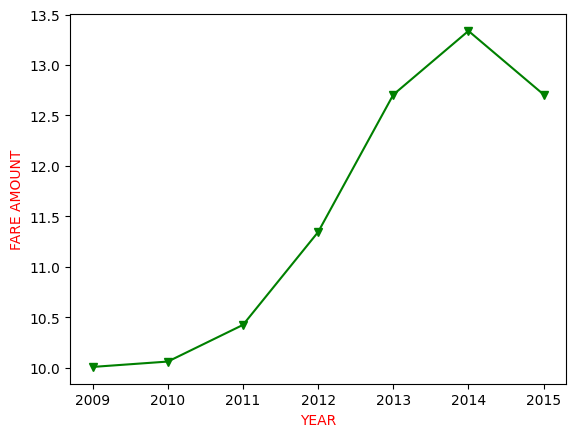

In [56]:
plt.plot(ypoints,marker="v",color='green')
plt.xlabel("YEAR",color='red')
plt.ylabel("FARE AMOUNT",color='red')

In [61]:
xpoints=df.groupby('Year')['passenger_count'].sum()
xpoints

Year
2009    11634.0
2010    11166.0
2011    11753.0
2012    12281.0
2013    11620.0
2014    11139.0
2015     5351.0
Name: passenger_count, dtype: float64

Text(0, 0.5, 'PASSENGER COUNT')

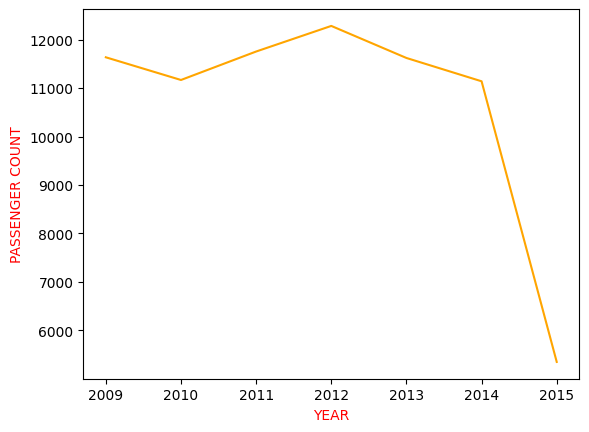

In [60]:
plt.plot(xpoints,color='orange')
plt.xlabel('YEAR',color='red')
plt.ylabel('PASSENGER COUNT',color='red')

Text(0, 0.5, 'Dropoff latitude')

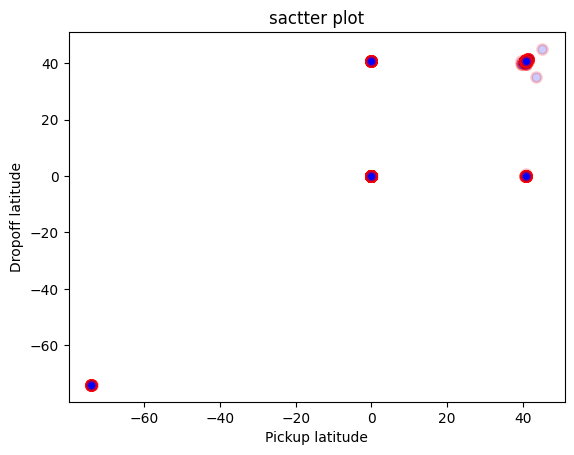

In [72]:
plt.scatter(df.pickup_latitude,df.dropoff_latitude, c='blue', s=50, alpha=0.2, linewidths=2, edgecolors='red')
plt.title("sactter plot")
plt.xlabel("Pickup latitude")
plt.ylabel("Dropoff latitude")

In [78]:
if(df.duplicated().all()==False):
  print("no duplicates in rows")

no duplicates in rows


In [80]:
df1=pd.DataFrame(df.drop_duplicates('pickup_latitude'))

In [82]:
df.notnull().sum()==df1.notnull().sum()

Unnamed: 0           False
key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
Year                 False
dtype: bool